In [1]:
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages
from statsmodels.tsa.stattools import adfuller # check for stationary data
from statsmodels.tsa.arima.model import ARIMA # arima model itself
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # find the p and q value
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') # layout to the graphs

In [2]:
def non_stationary_data(dataset):
    """
    Takes a dataset than check for all columns if they are stationary
    
    Parameters:
    - dataset: pd.dataFrame
    
    Returns:
    String that infomrs what columns are non stationary and respective values
    """

    # return values
    non_stationary_columns = []
    non_stationary_values = []

    # iterate over the df:
    for column_name, column_values in dataset.items():
        if column_name not in ['ANO', 'MED']: # removing columns no need to analyse
            current_p = adfuller(column_values)[1]
            if current_p >= 0.05:
                non_stationary_columns.append(column_name)
                non_stationary_values.append(current_p)
    return non_stationary_columns, non_stationary_values

In [3]:
def plot_suspects(columns, dataset):
    """
    Visualize the non stationary columns acf graphs with they 1st diff acf graphs
    
    Parameters:
    - dataset: pd.dataFrame
    - columns: list of columns name that are non stationary
    """

    for column in columns:
        plt.plot(dataset['ANO'], dataset[column], marker='o', linestyle='-') # Visualize the column over time
        plt.title(column+' x '+'ANO')
        plt.show()
        plot_acf(dataset[column].dropna(), lags=30) # acf graph
        plt.title('acf '+column)
        plt.show()
        dataset['DIFF'+column]= dataset[column].diff() # 1st diff acf graph
        plot_acf(dataset['DIFF'+column].dropna(), lags=30)
        plt.title('acf DIFF'+column)

In [4]:
def find_ar(dataset):
    """
    Plot pacf graphs of the columns of dataset
    
    Parameters:
    - dataset: pd.dataFrame
    """

    for column_name, column_values in dataset.items(): # interating over the columns of df
        if column_name not in ['ANO', 'MED']: # removing not important columns
            plot_pacf(dataset[column_name], lags=20) # making the graph with the lags and the column
            plt.title(column_name + ' PACF') # change in title so the user can distinguish than easely
            plt.show()

In [5]:
def find_ma(dataset):
    """
    Plot acf graphs of the columns of dataset
    
    Parameters:
    - dataset: pd.dataFrame
    """

    for column_name, column_values in dataset.items(): # interating over the columns of df
        if column_name not in ['ANO', 'MED']: # removing not important columns
            plot_acf(dataset[column_name], lags=20) # making the graph with the lags and the column
            plt.title(column_name + ' ACF') # change in title so the user can distinguish than easely
            plt.show()

In [6]:
# load data
csv_file_path = './CORUMBA.csv'
corumba = pd.read_csv(csv_file_path, skiprows=1, header=0)

# corumba = corumba.iloc[:-5]  # droping last 5 lines
# corumba = corumba.iloc[:, 1:-1]  #droping the first and last columns
# corumba = corumba.iloc[:-5, 1:-1]  #droping the first and last columns and last 5 lines
# print(corumba)
# non_stationary_data_var = non_stationary_data(corumba)
# print('Colunas não estacionárias: ' + str(non_stationary_data(corumba.dropna())[0]))
# print('Colunas não estacionárias: ' + str(stationary_data[0]))
# print('Valores de p: ' + str(stationary_data[1]))
# find_ma(corumba) # print auto correlations

In [11]:
# Creating lists
months = ['JAN', 'FEV', 'MAR', 'ABR', 'MAI', 'JUN', 'JUL', 'AGO', 'SET', 'OUT', 'NOV', 'DEZ']
p_values = [3, 3, 1, 1, 1, 1, 1, 1, 1, 0, 3, 0]
d_values = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
q_values = [3, 3, 1, 1, 1, 1, 1, 2, 2, 0, 4, 0]

# Creating the DataFrame with the p, d and q values of all columns
arima_variables_dic = {'Month': months, 'p': p_values, 'd': d_values, 'q': q_values}
arima_variables = pd.DataFrame(arima_variables_dic)

# Displaying the DataFrame
arima_variables

,Month,p,d,q
0,JAN,3,0,3
1,FEV,3,0,3
2,MAR,1,0,1
3,ABR,1,0,1
4,MAI,1,0,1
5,JUN,1,0,1
6,JUL,1,0,1
7,AGO,1,0,2
8,SET,1,0,2
9,OUT,0,0,0


In [41]:
# inform the month of the analysis:
MONTH = 'JUN'

# Getting the values for the variables
month_values = arima_variables[arima_variables['Month'] == MONTH]
p = month_values['p'].values[0]
d = month_values['d'].values[0]
q = month_values['q'].values[0]

# fitting the model
train = corumba[MONTH]
model = ARIMA(train, order=(p, d ,q))
fitted = model.fit()

In [42]:
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    JUN   No. Observations:                   86
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -417.718
Date:                Mon, 29 Jan 2024   AIC                            843.437
Time:                        07:50:17   BIC                            853.254
Sample:                             0   HQIC                           847.388
                                 - 86                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        107.5960      4.898     21.969      0.000      97.997     117.195
ar.L1          0.1642      0.484      0.340      0.734      -0.784       1.112
ma.L1          0.1216      0.485      0.251      0.802      -0.829       1.072
sigma2       967.9148    128.269      7.546      0.000     716.513    1219.317
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                18.33
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.57   Skew:                             0.74
Prob(H) (two-sided):                  0.13   Kurtosis:                         4.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

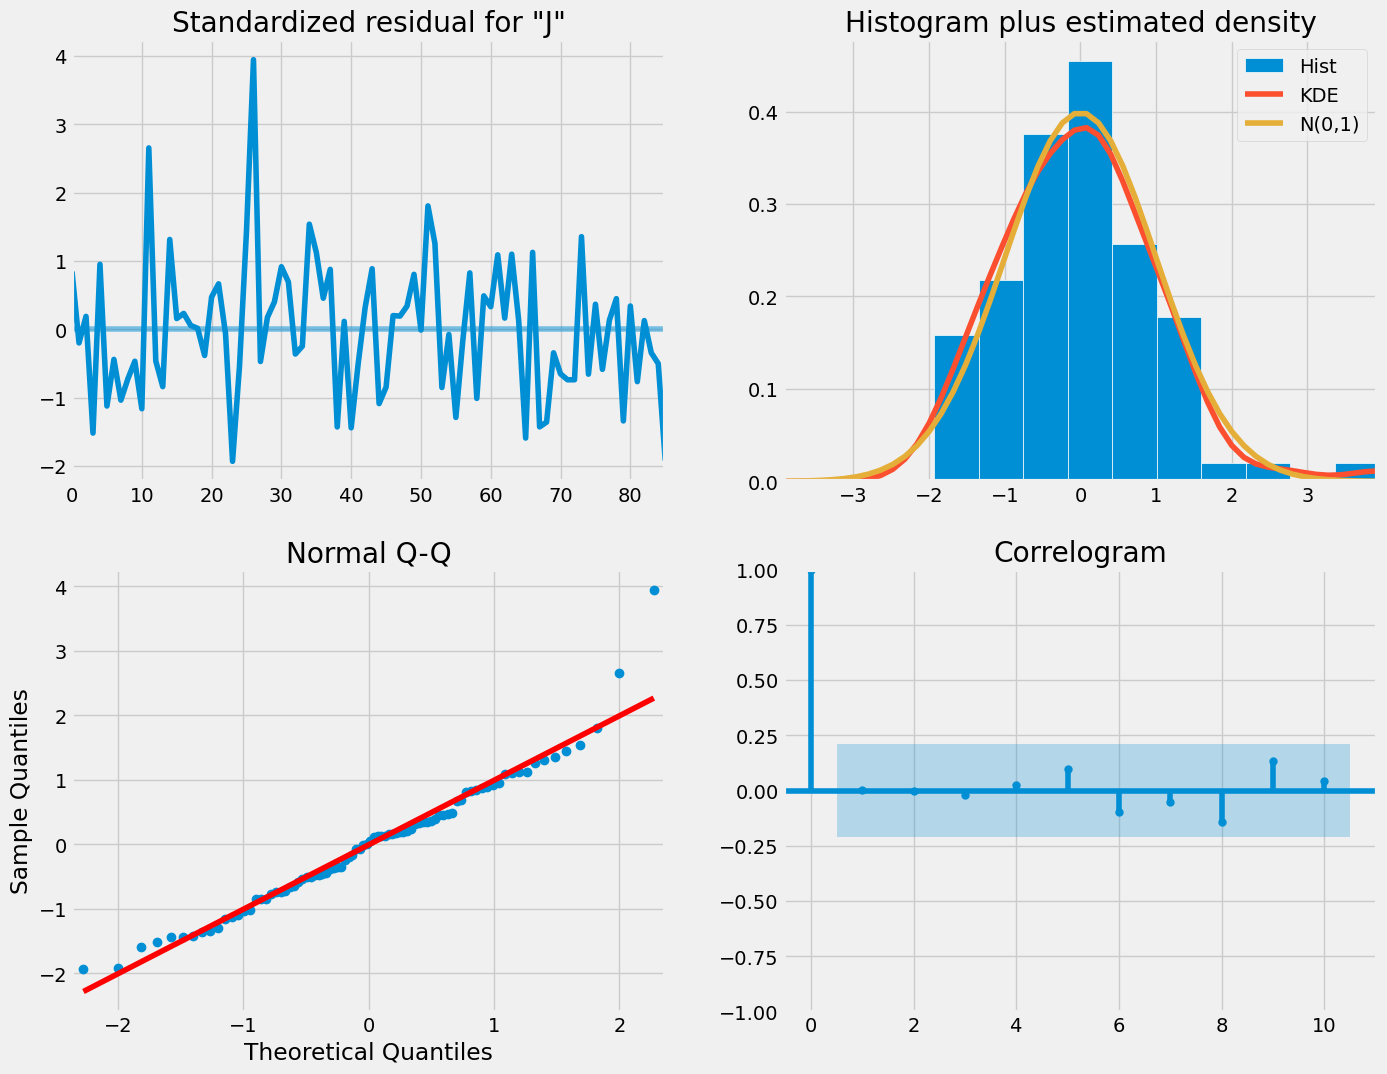

In [43]:
fitted.plot_diagnostics(figsize=(15, 12))
plt.show()

In [44]:
# Making prediction
pred = fitted.get_prediction(start=80, end=86, dynamic=False)
pred_ci = pred.conf_int()

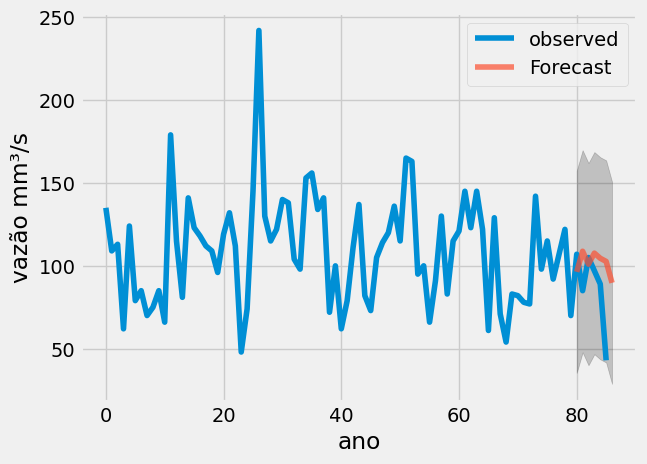

In [45]:
# Ploting prediction
ax = train.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('ano')
ax.set_ylabel('vazão mm³/s')
plt.legend()
plt.show()